<a href="https://colab.research.google.com/github/barnett23/Predicci-n-de-insuficiencias-cardiacas/blob/main/TP1/3_0_Predicci%C3%B3n_de_insuficiencias_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de insuficiencia cardíaca
El algoritmo K-Nearest Neighbors (KNN) fue seleccionado para este proyecto debido a su simplicidad, flexibilidad y capacidad para abordar problemas de clasificación, como la predicción de eventos de muerte en pacientes con insuficiencia cardíaca. KNN no asume ninguna relación funcional específica entre las variables de entrada y la salida, lo que lo hace ideal para situaciones donde las relaciones entre las características son no lineales o difíciles de modelar.

Para mejorar su rendimiento, se aplicaron varias técnicas, como SMOTE (Synthetic Minority Oversampling Technique) para balancear las clases, escalado de datos, reducción de dimensionalidad mediante PCA, y optimización del hiperparámetro K utilizando GridSearchCV.


Este código tiene como objetivo cargar, analizar y preparar un conjunto de datos sobre insuficiencia cardíaca para su posterior análisis estadístico o modelado predictivo. Se utilizan herramientas avanzadas para manejar datos, realizar visualizaciones y aplicar técnicas de aprendizaje automático.

El siguiente bloque de código establece la base para un análisis completo de los datos de insuficiencia cardíaca. Las bibliotecas importadas y la carga de datos permiten realizar operaciones avanzadas como preprocesamiento, visualización y modelado. Los pasos iniciales aseguran que los datos se carguen correctamente y muestra ub fragmento del DataFrame.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib as mpl
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV

# Cargar el archivo Excel
uploaded = files.upload()
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Análisis exploratorio de los datos

Este fragmento del código tiene como objetivo realizar un análisis exploratorio inicial del conjunto de datos de insuficiencia cardíaca, enfocado en comprender las características generales de las variables y sus posibles relaciones. Para comenzar, se genera un resumen descriptivo mediante la función heart_data.describe(), que calcula estadísticas básicas como la media, desviación estándar, valores mínimos y máximos, así como percentiles (25%, 50% y 75%) para cada variable numérica. Esto proporciona una visión general del rango y la distribución de las variables, lo que resulta útil para identificar patrones, valores atípicos y posibles inconsistencias en los datos. Los resultados de este análisis descriptivo se imprimen en la consola para su revisión.

A continuación, se crean gráficos de dispersión para visualizar relaciones bivariadas entre las variables seleccionadas: edad, niveles de creatina-fosfoquinasa, fracción de eyección, número de plaquetas, creatinina sérica, sodio sérico y tiempo de seguimiento. Esto se logra mediante la función sns.pairplot(), que genera un conjunto de diagramas de dispersión para cada par de variables, junto con histogramas en la diagonal para mostrar sus distribuciones individuales. Estos gráficos permiten identificar posibles correlaciones, tendencias y agrupamientos en los datos.

En resumen, este análisis combina estadísticas descriptivas y visualizaciones gráficas para proporcionar una comprensión preliminar del conjunto de datos. Estas herramientas ayudan a detectar características clave, como distribuciones inusuales o relaciones significativas entre variables, lo cual es esencial para preparar los datos para el modelado predictivo.

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

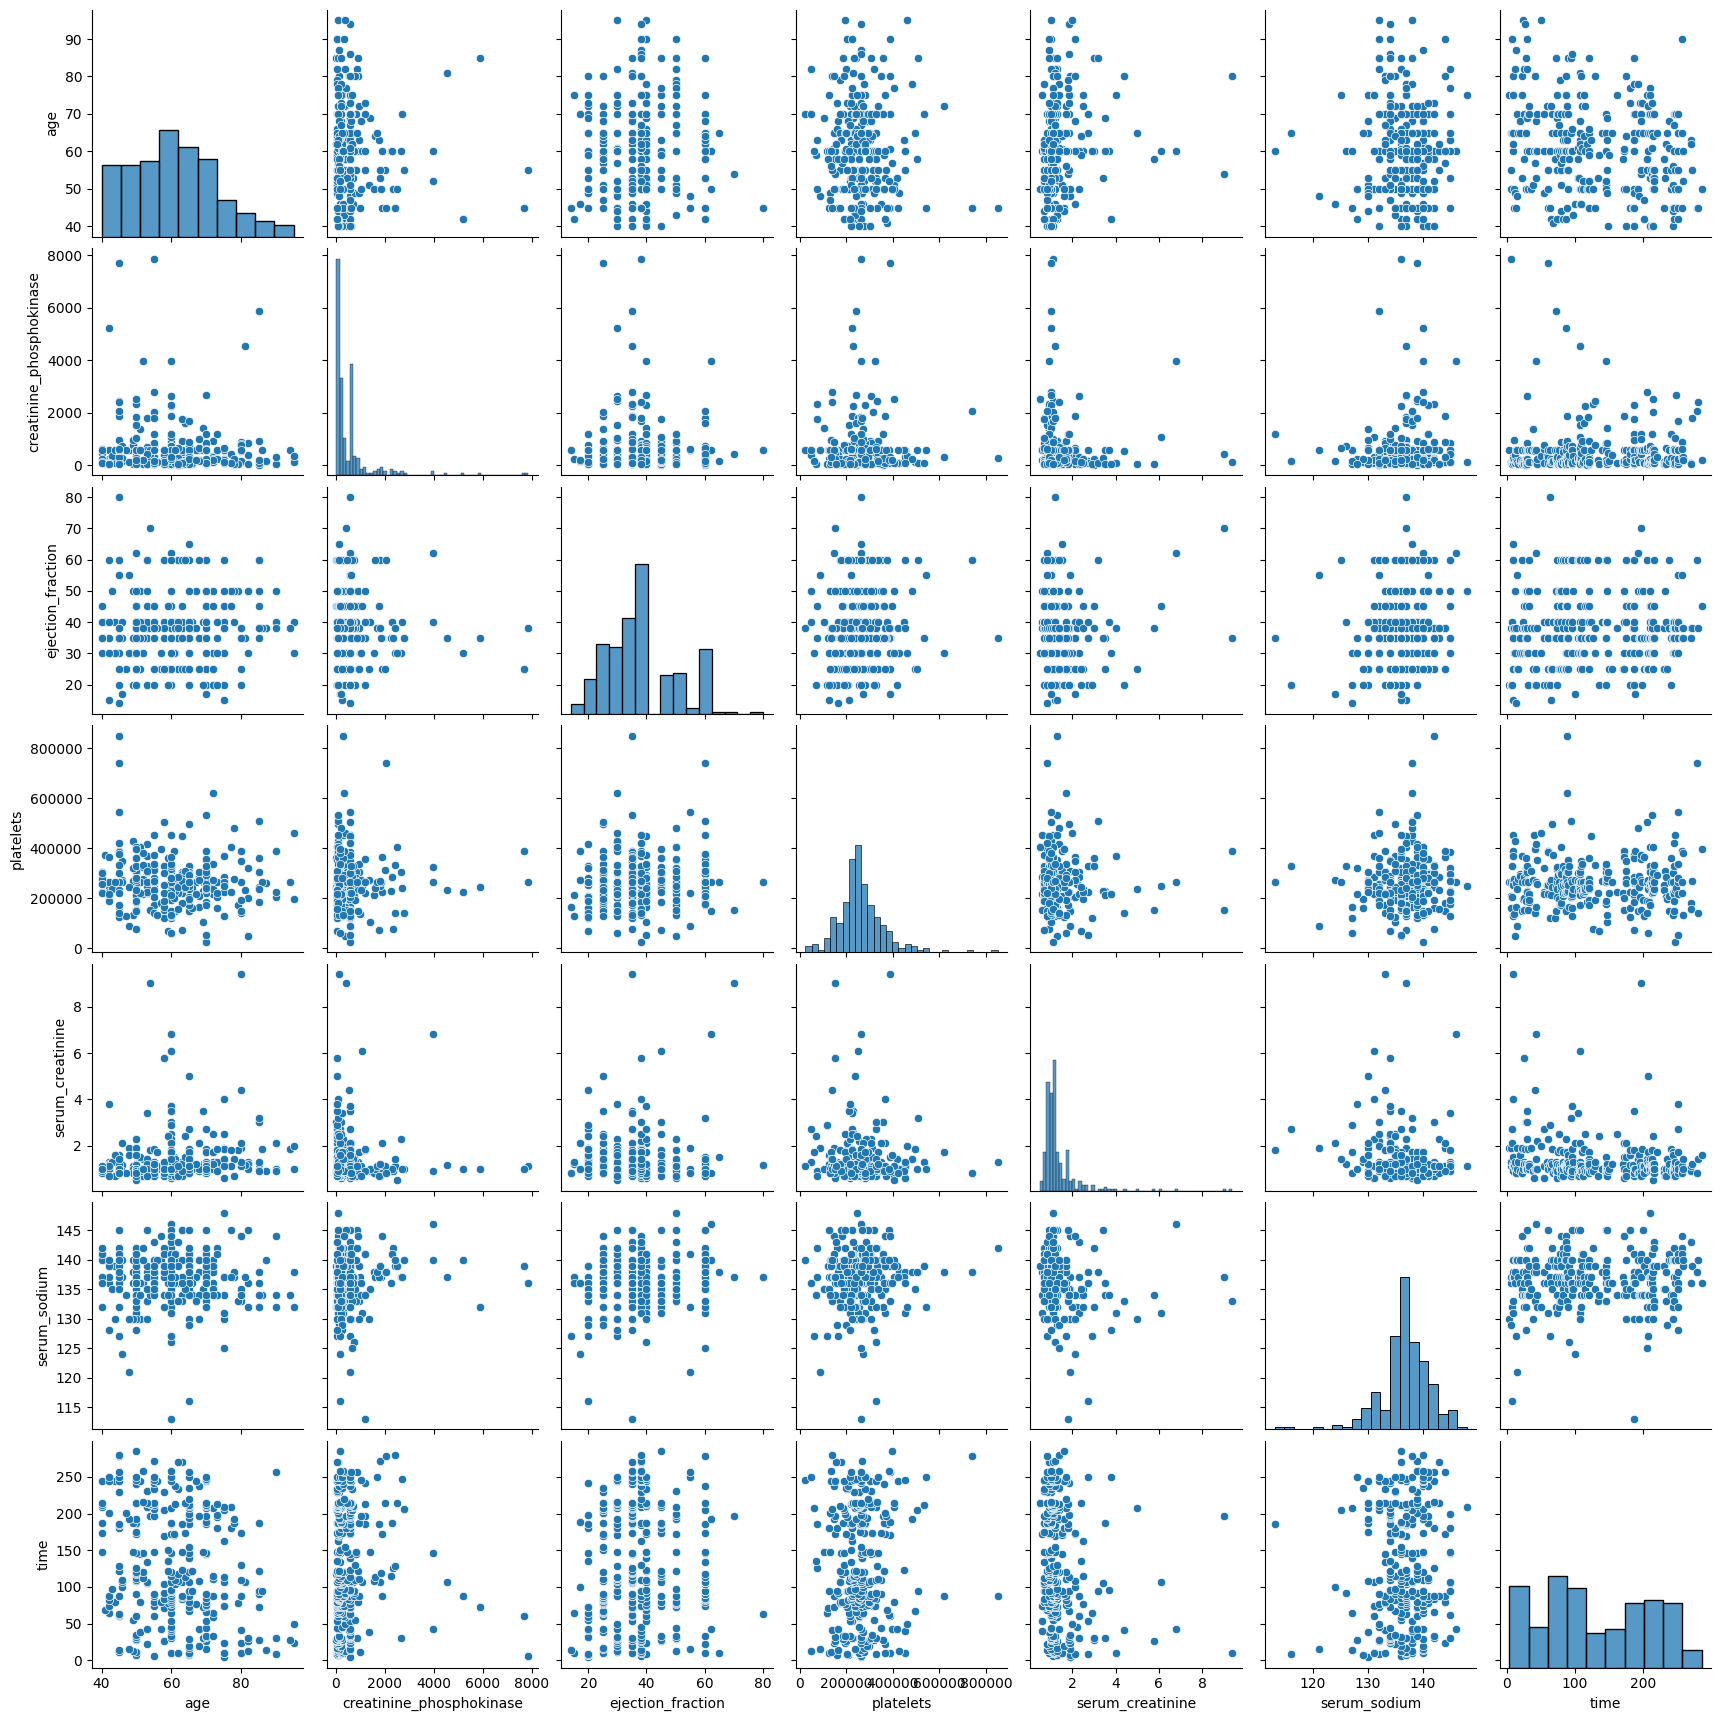

In [ ]:
# Resumen descriptivo de los datos
summary = heart_data.describe()

# Mostrar resumen
print(summary)

# Graficos de dispercion
# Select the columns you want to plot
columns_to_plot = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create scatter plots for each pair of variables
sns.pairplot(heart_data[columns_to_plot])
plt.show()

# Análisis de Calidad y Distribución de Datos

Este fragmento de código tiene como finalidad realizar una exploración más profunda del conjunto de datos para identificar valores faltantes, analizar la distribución de las variables numéricas y detectar posibles valores atípicos. Estas acciones son esenciales para garantizar la calidad de los datos antes de proceder con cualquier análisis o modelado predictivo.

En primer lugar, se lleva a cabo la detección de valores faltantes utilizando heart_data.isnull().sum(). Este comando evalúa cada columna del conjunto de datos y calcula el número total de valores ausentes en cada una. Los resultados se imprimen en la consola, proporcionando una visión clara de si existen datos incompletos que deban ser tratados mediante técnicas de imputación o eliminación.

A continuación, se analizan las distribuciones de las variables numéricas mediante histogramas generados con heart_data.hist(). Estos gráficos permiten visualizar cómo están distribuidos los valores en cada variable, destacando posibles sesgos o distribuciones inusuales. Para garantizar una vista integral, se configuran 15 intervalos (bins) y un tamaño adecuado de figura (figsize), lo que facilita la interpretación visual de las distribuciones.

Finalmente, se exploran los posibles valores atípicos para variables clave como edad, creatina-fosfoquinasa, fracción de eyección, plaquetas, creatinina sérica, sodio sérico y tiempo de seguimiento. Para ello, se utilizan diagramas combinados de swarmplot y boxenplot en función de la variable objetivo DEATH_EVENT. Los swarmplots visualizan la dispersión de los datos en cada categoría de DEATH_EVENT, mientras que los boxenplots destacan los valores atípicos y la distribución central. Estas representaciones gráficas son útiles para identificar relaciones entre las variables predictoras y la variable objetivo, así como para resaltar datos extremos que podrían influir en el modelado.

En resumen, este análisis detecta problemas de calidad en los datos, como valores faltantes y atípicos, y proporciona una visión detallada de la distribución de las variables. Estos pasos aseguran que el conjunto de datos esté en condiciones óptimas para los procedimientos analíticos y predictivos posteriores.

Valores faltantes por columna:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


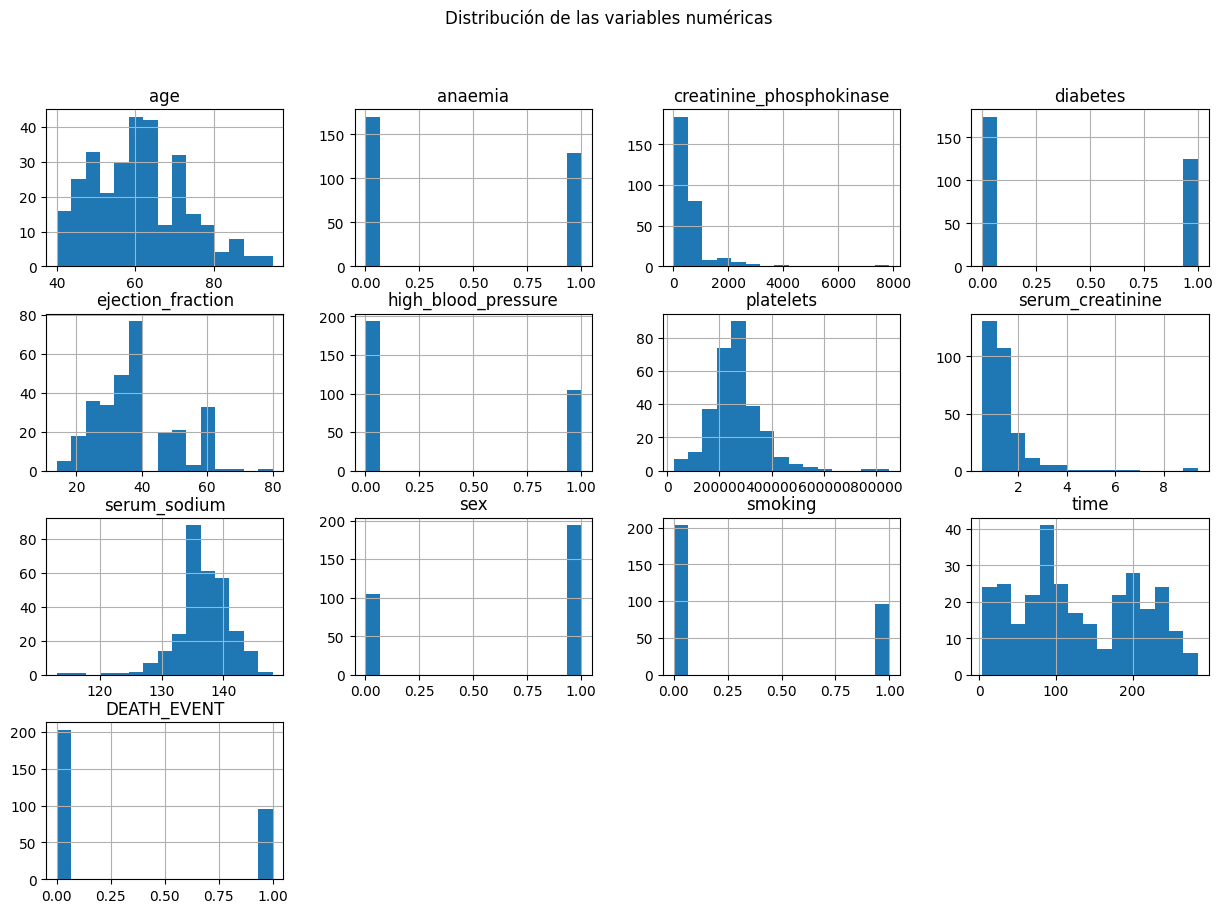

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)


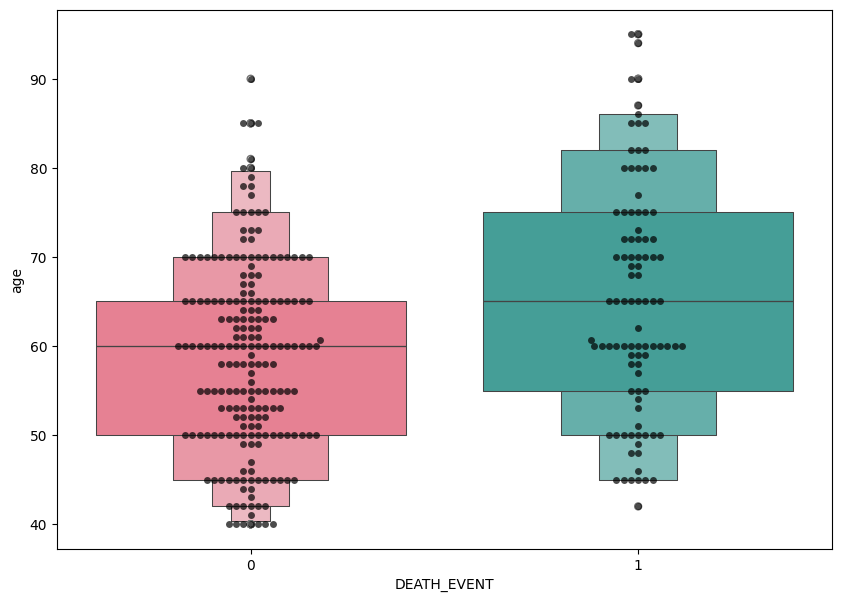

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


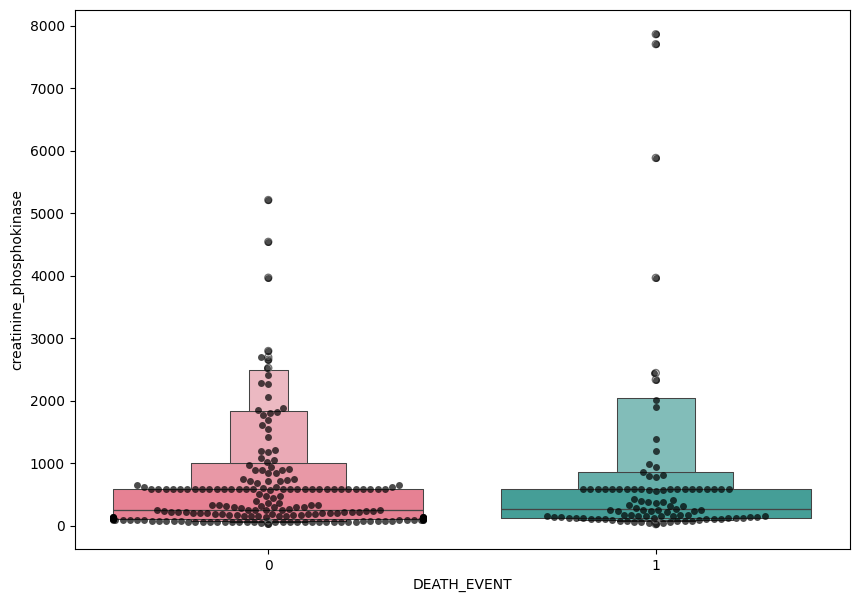

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)


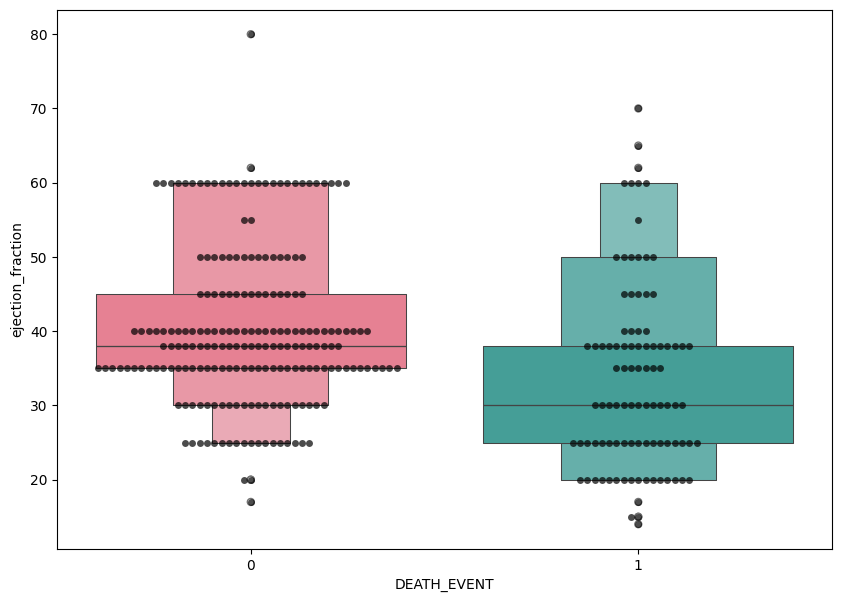

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)


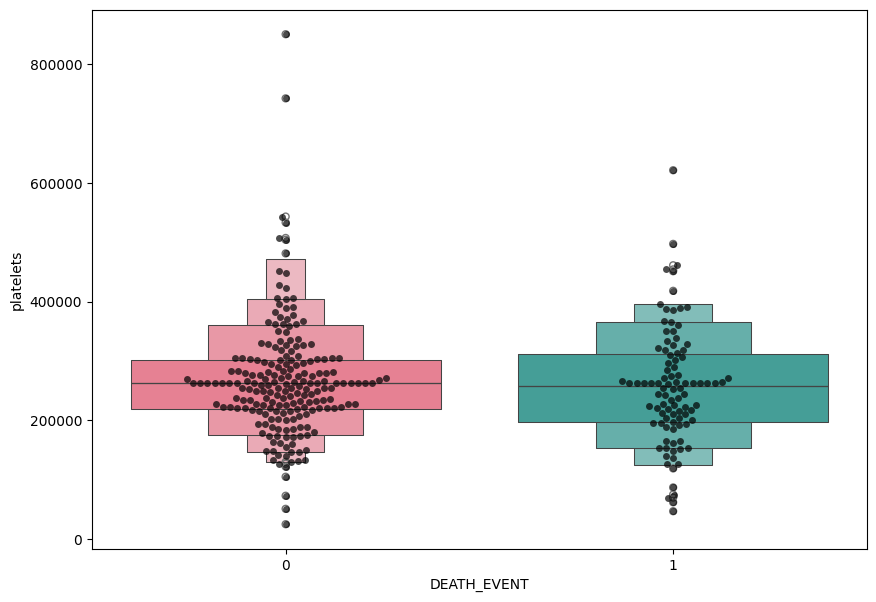

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


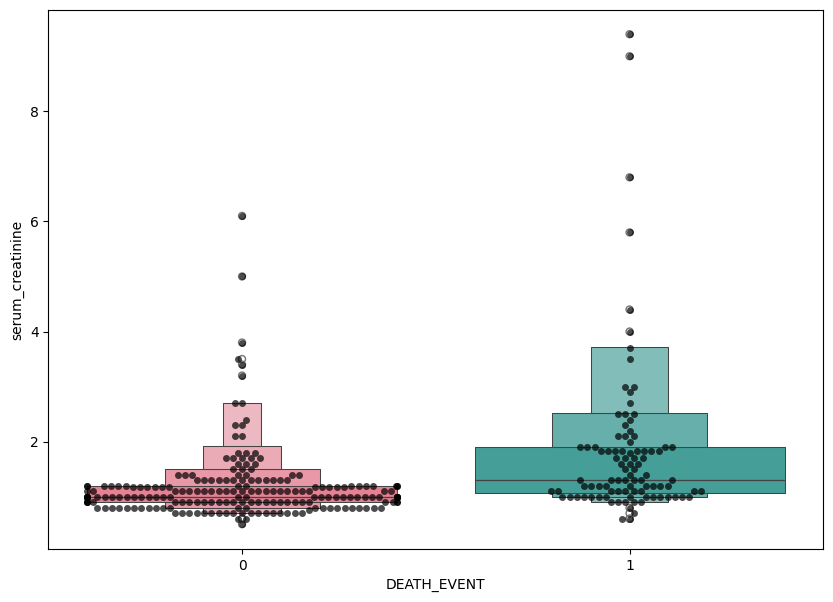

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)


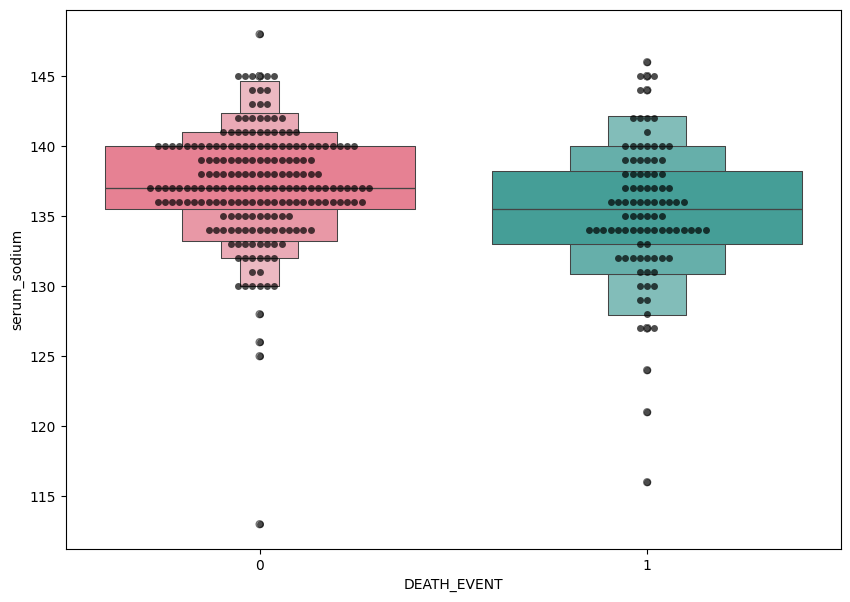

<ipython-input-7-686966536b97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)


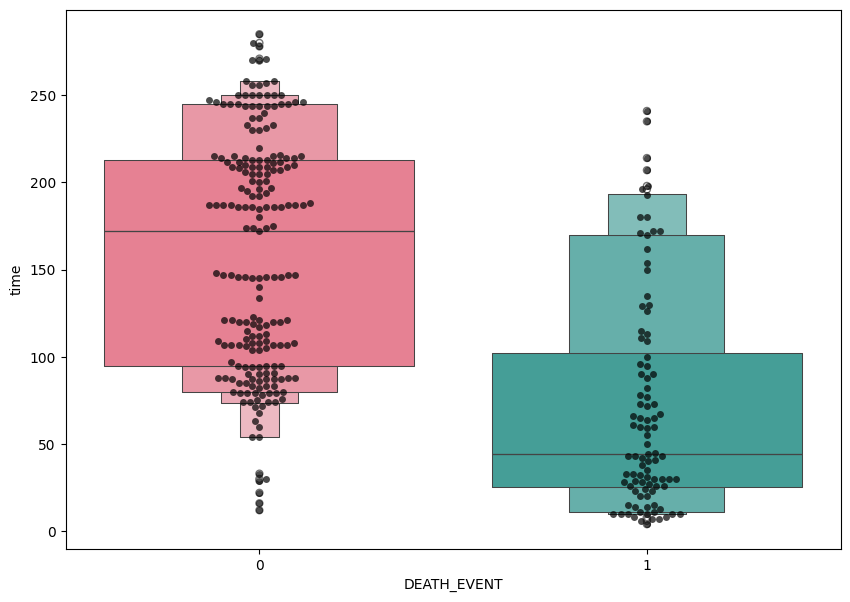

In [ ]:
# Exploramos los valores faltantes
missing_values = heart_data.isnull().sum()

# Conteo de valores faltantes
print("Valores faltantes por columna:")
print(missing_values)

# Distribuciones de las variables numéricas
heart_data.hist(bins=15, figsize=(15,10))
plt.suptitle("Distribución de las variables numéricas")
plt.show()

# Posibles valores atipicos
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
cols = sns.color_palette("husl", 2)
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], color="black", alpha=0.7)
    sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=cols)
    plt.show()


# Análisis de Correlaciones entre Variables y Distribución por Edad"

En este fragmento de código se analiza la relación entre las variables del conjunto de datos, evaluando específicamente la importancia de la edad como factor en los eventos de muerte, además de visualizar las correlaciones generales entre todas las variables.

En primer lugar, se calcula la matriz de correlaciones utilizando heart_data.corr(). Esta matriz contiene los coeficientes de correlación entre todas las variables numéricas del conjunto de datos, permitiendo identificar relaciones lineales significativas que puedan ser relevantes para el análisis predictivo.

Posteriormente, se evalúa si la edad es un factor influyente en los eventos de muerte (DEATH_EVENT). Esto se realiza mediante un gráfico de barras apiladas generado con sns.countplot, que muestra la distribución de edades diferenciada por la ocurrencia o no de un evento de muerte. Este análisis visual ayuda a identificar tendencias específicas de edad asociadas con el desenlace clínico.

Por último, se visualiza la matriz de correlaciones mediante un mapa de calor generado con sns.heatmap. Este gráfico utiliza un esquema de colores coolwarm para destacar las correlaciones positivas (en rojo) y negativas (en azul) entre las variables. Los valores numéricos de las correlaciones se anotan directamente en el gráfico para facilitar la interpretación. La visualización permite identificar rápidamente relaciones fuertes o débiles entre las variables, lo cual es clave para seleccionar predictores significativos en el modelado.

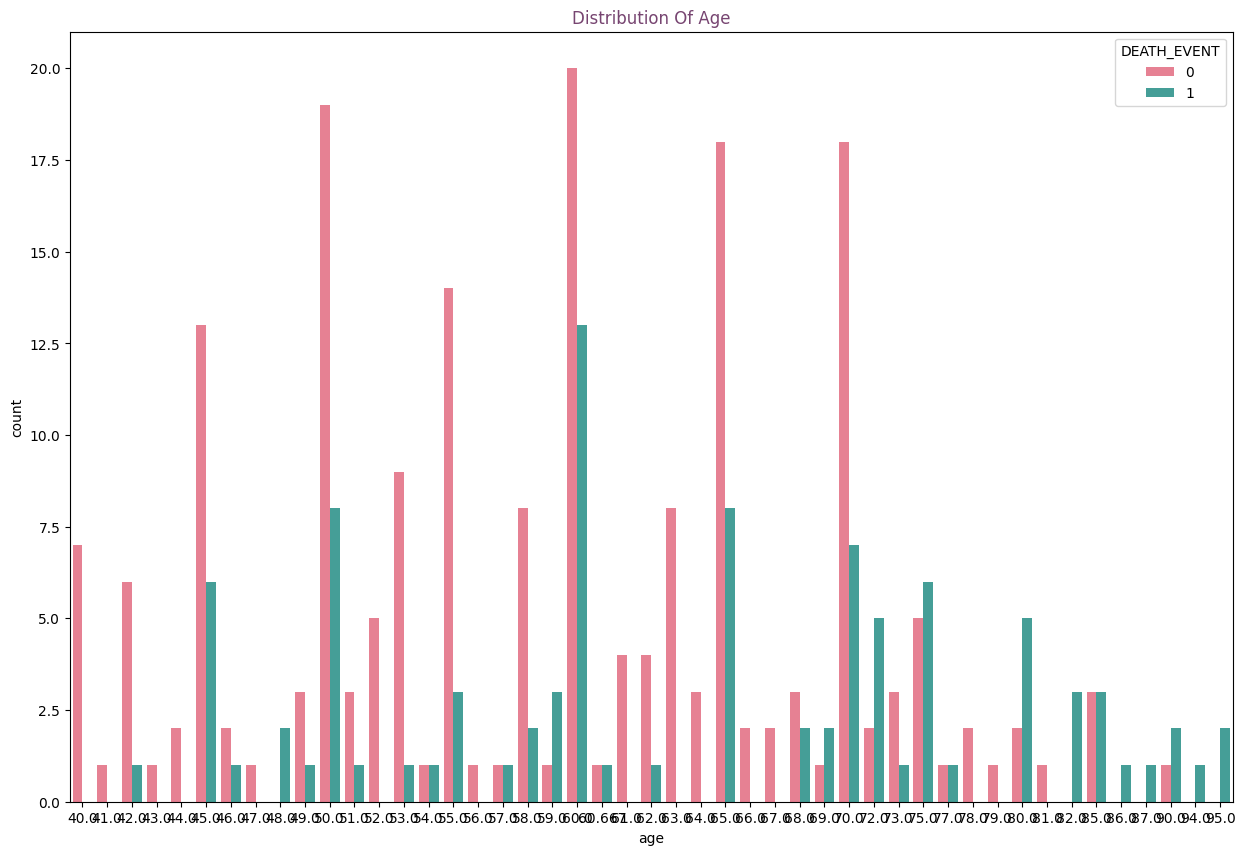

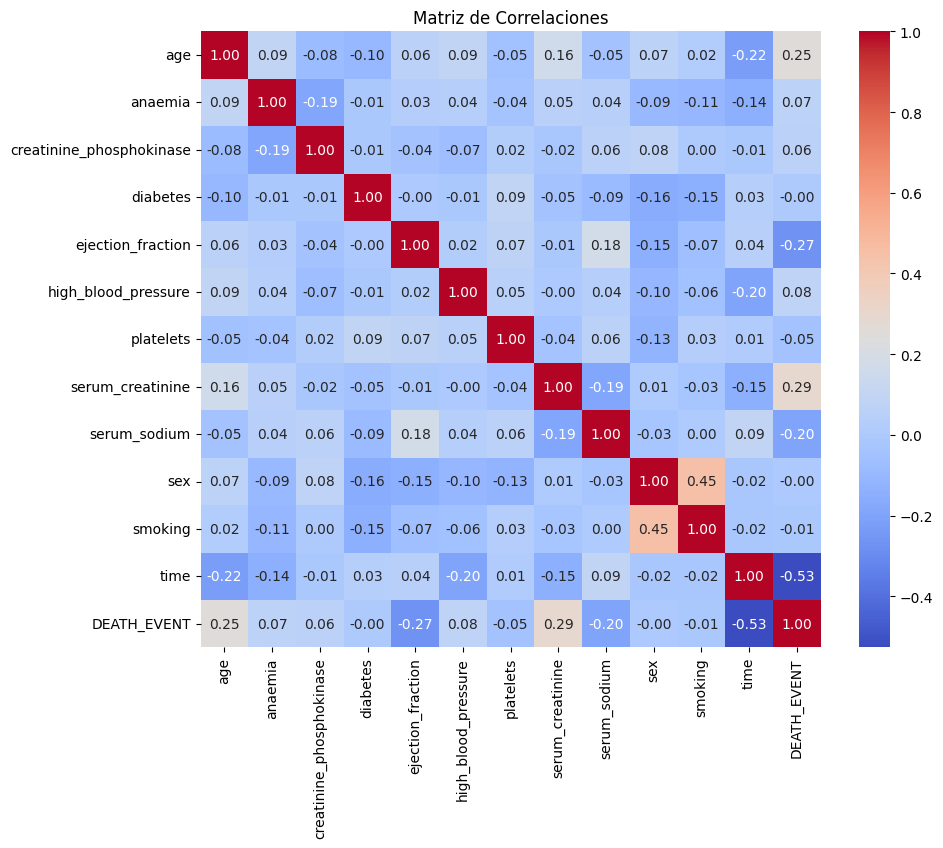

In [ ]:
# Correlaciones entre las variables
correlation_matrix = heart_data.corr()

# Evaluar si la edad es un factor decisivo en los eventos de muerte
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=heart_data['age'],data=heart_data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

# Mapa de calor de las correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaciones')
plt.show()



# Modelo KNN con Reducción de Dimensionalidad (PCA) y Sin Balanceo de Clases (SMOTE)

Este fragmento de código implementa un modelo de clasificación basado en el algoritmo K-Nearest Neighbors (KNN) para predecir eventos de muerte en pacientes (DEATH_EVENT). El análisis incluye la preparación de los datos, la reducción de dimensionalidad, la optimización de hiperparámetros y la evaluación del modelo, todo ello sin aplicar técnicas de balanceo de clases como SMOTE. Este enfoque puede ayudar a identificar patrones en los datos, aunque es importante considerar las limitaciones asociadas con el desbalanceo de clases.

Primero, los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función train_test_split. El conjunto de entrenamiento representa el 70% de los datos y se utiliza para construir el modelo, mientras que el 30% restante conforma el conjunto de prueba para evaluar el desempeño del modelo. Las características predictoras se separan de la variable objetivo (DEATH_EVENT) para facilitar el procesamiento posterior.

En una segunda etapa, se realiza el escalamiento de las características mediante StandardScaler, lo que asegura que todas las variables tengan media cero y desviación estándar uno. Este paso es esencial para evitar que las características con mayor escala dominen en el cálculo de distancias, fundamental para el funcionamiento del modelo KNN. Posteriormente, se aplica el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos, reteniendo el 90% de la varianza. Esta reducción elimina ruido en los datos y mejora la eficiencia computacional sin comprometer significativamente la información útil para el modelo.

La optimización del modelo KNN se realiza utilizando GridSearchCV, que prueba diferentes valores para el número de vecinos (K) en un rango de 1 a 30. Este proceso identifica el valor de K que maximiza la precisión en validación cruzada. Con el valor óptimo de K determinado, se entrena el modelo final utilizando los datos transformados por PCA.

El modelo se evalúa en el conjunto de prueba mediante la métrica de precisión y la generación de una matriz de confusión. La precisión refleja la proporción de predicciones correctas realizadas por el modelo, mientras que la matriz de confusión proporciona información detallada sobre los aciertos y errores en la clasificación de ambas clases (eventos de muerte y no muerte). Además, se grafica la tasa de error (1 - precisión) para cada valor de K evaluado, lo que ofrece una visión sobre cómo el rendimiento del modelo varía según este hiperparámetro.

En conclusión, este enfoque optimiza y evalúa un modelo KNN con técnicas de escalamiento y reducción de dimensionalidad. Aunque logra resultados satisfactorios, la ausencia de balanceo de clases podría impactar negativamente el desempeño al clasificar correctamente la clase minoritaria. Por tanto, incluir SMOTE en etapas futuras podría ser una mejora significativa para abordar el desbalance en los datos y mejorar la capacidad del modelo para identificar eventos de muerte.

Precisión del modelo optimizado KNN con PCA (sin SMOTE): 0.7000


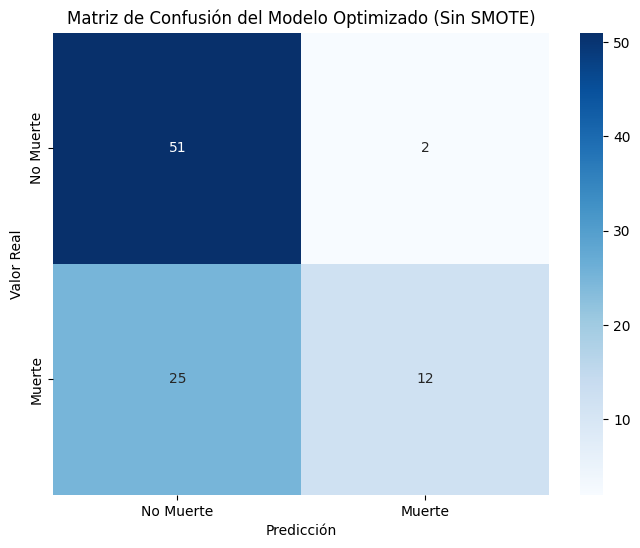

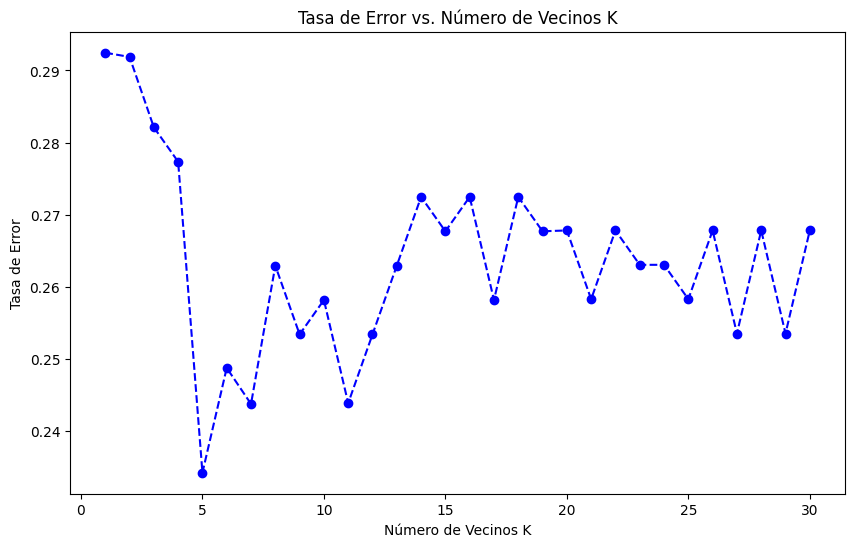

Optimal K: 5


In [ ]:
# SMOTE NO IMPLEMENTADO
X = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']

# 1. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Aplicar PCA para reducir la dimensionalidad (retener 90% de la varianza)
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4. Optimizar el valor de K en KNN usando GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)
optimal_k = grid_search.best_params_['n_neighbors']

# 5. Entrenar el modelo KNN con el valor óptimo de K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_pca, y_train)

# 6. Hacer predicciones y calcular la precisión en el conjunto de prueba
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo optimizado KNN con PCA (sin SMOTE): {accuracy:.4f}")

# 7. Mostrar la matriz de confusión para visualizar el rendimiento del modelo
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Muerte', 'Muerte'],
            yticklabels=['No Muerte', 'Muerte'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Optimizado (Sin SMOTE)')
plt.show()

# 8. Graficar la precisión del modelo para cada valor de K probado en la búsqueda de hiperparámetros
error_rates = [1 - score for score in grid_search.cv_results_['mean_test_score']]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Vecinos K')
plt.ylabel('Tasa de Error')
plt.title('Tasa de Error vs. Número de Vecinos K')
plt.show()

print(f"Optimal K: {optimal_k}")


# Modelo KNN con Reducción de Dimensionalidad (PCA) y Balanceo de Clases (SMOTE)

Este fragmento de código implementa un modelo de clasificación utilizando el algoritmo K-Nearest Neighbors (KNN), con la adición de SMOTE (Synthetic Minority Oversampling Technique) para balancear las clases y PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de los datos. A través de esta implementación, se busca mejorar la precisión del modelo, especialmente en problemas con clases desbalanceadas como el caso de los eventos de muerte (DEATH_EVENT), donde una de las clases (muerte) tiene menos representación.

En primer lugar, los datos se dividen en un conjunto de entrenamiento y uno de prueba, con un 70% de los datos asignados a entrenamiento y un 30% a prueba. Esta división permite entrenar el modelo con una porción de los datos y luego evaluar su rendimiento en datos no vistos. Una vez que los datos están divididos, se aplica SMOTE al conjunto de entrenamiento para balancear las clases. SMOTE genera nuevas muestras sintéticas para la clase minoritaria (eventos de muerte), lo que ayuda a que el modelo no se sesgue hacia la clase mayoritaria (no muerte).

A continuación, se realiza un proceso de escalamiento de los datos usando StandardScaler, que ajusta las características para que tengan una media de cero y una desviación estándar de uno. Este paso es crucial en los modelos basados en distancias, como KNN, ya que garantiza que todas las variables contribuyan de manera equitativa al cálculo de distancias. Después del escalamiento, se aplica PCA para reducir la dimensionalidad de los datos, reteniendo el 90% de la varianza. Este paso reduce la complejidad del modelo y mejora la eficiencia sin perder información importante.

Precisión del modelo optimizado KNN con PCA y SMOTE: 0.6667


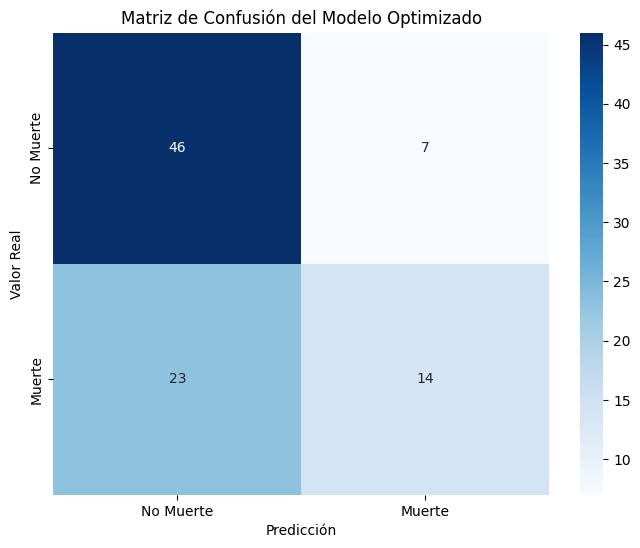

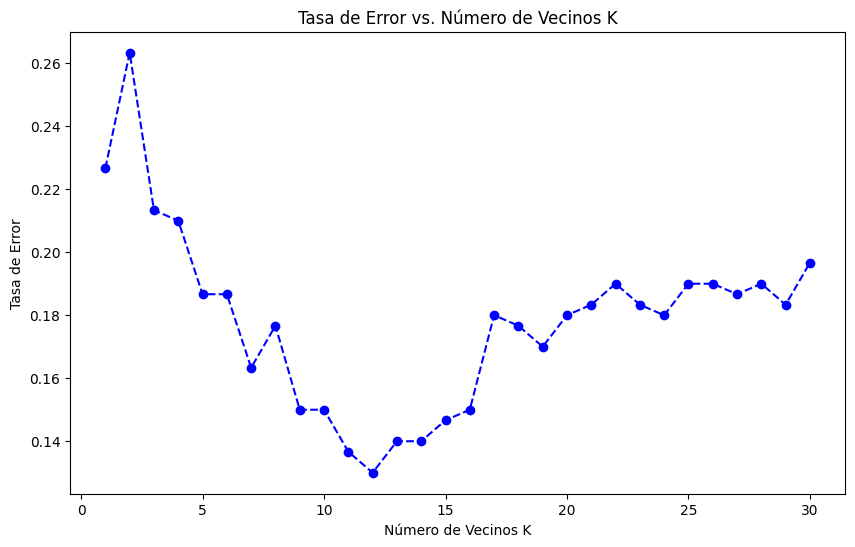

Optimal K: 12


In [ ]:
# SMOTE IMPLEMENTADO
X = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']

# 1. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 4. Aplicar PCA para reducir la dimensionalidad (retener 90% de la varianza)
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. Optimizar el valor de K en KNN usando GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train_resampled)
optimal_k = grid_search.best_params_['n_neighbors']

# 6. Entrenar el modelo KNN con el valor óptimo de K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_pca, y_train_resampled)

# 7. Hacer predicciones y calcular la precisión en el conjunto de prueba
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo optimizado KNN con PCA y SMOTE: {accuracy:.4f}")

# 8. Mostrar la matriz de confusión para visualizar el rendimiento del modelo
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Muerte', 'Muerte'],
            yticklabels=['No Muerte', 'Muerte'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Optimizado')
plt.show()

# 9. Graficar la precisión del modelo para cada valor de K probado en la búsqueda de hiperparámetros
error_rates = [1 - score for score in grid_search.cv_results_['mean_test_score']]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Vecinos K')
plt.ylabel('Tasa de Error')
plt.title('Tasa de Error vs. Número de Vecinos K')
plt.show()

print(f"Optimal K: {optimal_k}")


# Evaluación del Desempeño del Modelo de Clasificación

Este código realiza una evaluación completa del desempeño de un modelo de clasificación, como un k-Nearest Neighbors (kNN), utilizando métricas clave y visualizaciones informativas. En primer lugar, se calculan las métricas principales a partir de las predicciones del modelo. Estas incluyen la precisión, que mide la proporción de predicciones correctas, la sensibilidad o recall, que indica la capacidad del modelo para identificar correctamente los casos positivos, y la especificidad, que evalúa su capacidad para identificar los negativos. Además, se calcula el F1-Score, una métrica que combina precisión y sensibilidad para ofrecer una visión balanceada del rendimiento. Estas métricas se derivan del informe de clasificación generado con los datos de prueba.

Para analizar la capacidad del modelo de distinguir entre clases, se construye la curva ROC (Receiver Operating Characteristic). Esta curva traza la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en diferentes umbrales de decisión. El área bajo esta curva (AUC-ROC) se calcula como una métrica resumen, donde un valor cercano a 1 indica un excelente rendimiento del modelo. La curva ROC se visualiza gráficamente junto con una línea diagonal que sirve como referencia para un modelo que predice aleatoriamente.

Otro aspecto destacado del análisis es la matriz de confusión, que resume las predicciones del modelo en una tabla donde se diferencian los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Esta matriz se presenta como un mapa de calor, facilitando su interpretación visual. Los ejes están etiquetados con las clases objetivo ("Muerte" y "No Muerte"), lo que proporciona un contexto claro para evaluar los errores y aciertos del modelo.

Finalmente, las métricas clave se imprimen en formato legible, ofreciendo una visión clara del desempeño global del modelo. Esto incluye la precisión, la sensibilidad, la especificidad, el F1-Score y el AUC-ROC. En conjunto, este análisis permite evaluar detalladamente la efectividad del modelo de clasificación, considerando tanto métricas generales como aspectos específicos de su comportamiento.

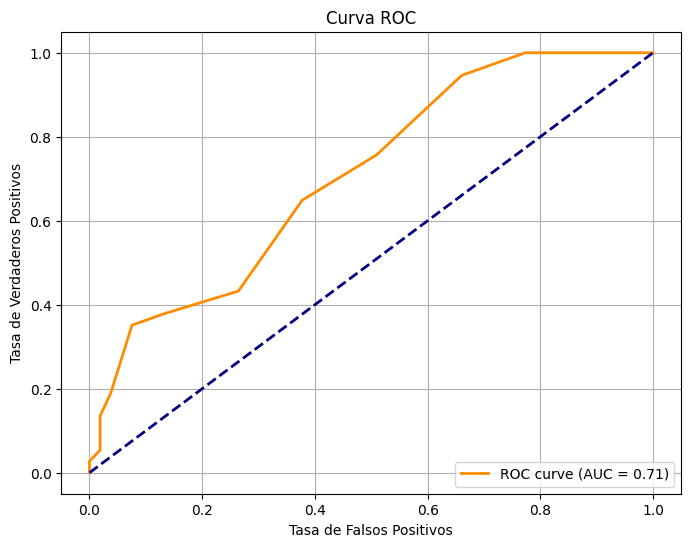

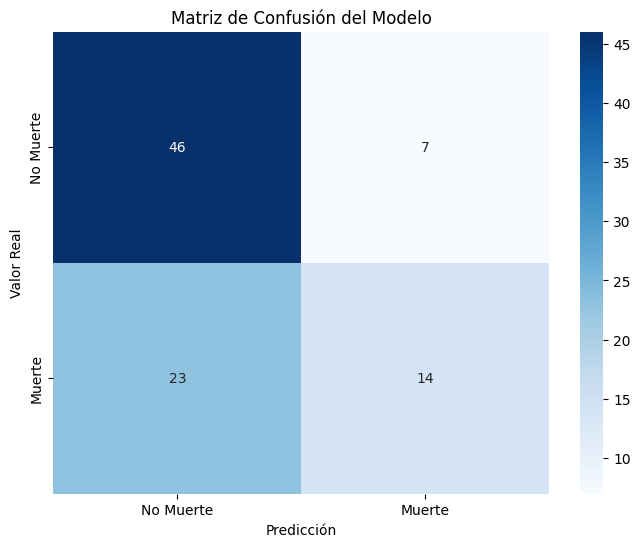

Precisión: 0.6667
Sensibilidad (Recall): 0.3784
Especificidad: 0.8679
F1-Score: 0.4828
AUC-ROC: 0.7073


In [ ]:
!pip install scikit-learn
from sklearn.metrics import roc_curve, auc

# 1. Calcular métricas
y_pred_proba = knn.predict_proba(X_test_pca)[:, 1]  # Probabilidades para curva ROC
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Métricas principales
sensitivity = report["1"]["recall"]  # Verdaderos positivos / Total de positivos reales
specificity = report["0"]["recall"]  # Verdaderos negativos / Total de negativos reales
f1 = report["1"]["f1-score"]         # Promedio armónico de precisión y recall

# 2. Calcular y graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 3. Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Muerte', 'Muerte'],
            yticklabels=['No Muerte', 'Muerte'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo')
plt.show()

# 4. Imprimir métricas clave
print(f"Precisión: {accuracy:.4f}")
print(f"Sensibilidad (Recall): {sensitivity:.4f}")
print(f"Especificidad: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


# Análisis de Resultados
Los resultados obtenidos reflejan un desempeño moderado del modelo de clasificación. La precisión de 66.67% indica que el modelo acierta en la mayoría de las predicciones, pero no alcanza un nivel sobresaliente. Este valor puede estar influenciado por el balance de clases en los datos, lo que sugiere que no es suficiente evaluar únicamente esta métrica para entender el desempeño global del modelo.

Por otro lado, la sensibilidad (recall) de 37.84% es relativamente baja, lo que señala que el modelo tiene dificultades para identificar correctamente los casos positivos, como "Muerte" en este escenario. Esta debilidad puede ser crítica si la identificación precisa de la clase positiva es prioritaria en el problema, por ejemplo, en aplicaciones médicas o de seguridad.

En contraste, la especificidad es alta, con un valor de 86.79%. Esto demuestra que el modelo es eficaz al clasificar correctamente los casos negativos ("No Muerte"). Sin embargo, este resultado podría estar ocurriendo a costa de una sensibilidad reducida, lo que indica un sesgo hacia la clase negativa, limitando la utilidad del modelo en situaciones donde ambos tipos de predicción son igualmente importantes.

El F1-Score, que combina precisión y sensibilidad, es de 48.28%, lo que sugiere un balance limitado entre estas métricas clave. Este valor confirma que, aunque el modelo es razonablemente preciso, su capacidad para detectar casos positivos de manera confiable es deficiente.

Por último, el AUC-ROC de 70.73% muestra que el modelo tiene una capacidad aceptable para distinguir entre clases positivas y negativas, superando el azar. Sin embargo, no alcanza niveles excelentes, lo que indica margen para mejoras en su capacidad de discriminación.

Como pasos futuros sería beneficioso explorar modelos más complejos, como Random Forest, Gradient Boosting o redes neuronales, que suelen ser más robustos y efectivos en problemas con datos desbalanceados o donde la sensibilidad es una prioridad. La implementación de técnicas de ensamble, como bagging o boosting, también podría mejorar la estabilidad y precisión del modelo.

Por otro lado, es fundamental revisar la calidad de los datos y las características utilizadas. La ingeniería de características, la selección de variables relevantes y la extracción de nuevas características podrían enriquecer la representación de los datos, mejorando el rendimiento del modelo.

